In [1]:
using PyPlot

# http://lib.stat.cmu.edu/datasets/boston
# predicting the median value of owner-occupied homes in $1000's

include("real_experiments_boston_constant.jl")

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = import_sklearn() at Skcore.jl:120
└ @ ScikitLearn.Skcore C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:120
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at Skcore.jl:158
└ @ Core C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:158


sigma is 4.0
k is 4
num samples 506
[0.201695, 0.611295, 0.0716561, 0.0556582, 0.0, 0.0, 0.00394809, 0.0462335, 0.00951386, 0.0, 0.0, 0.0, 0.0]
num leaves merging 25
mse merging 19.24249555466586
mse cart 6.154687171414071
time merging 0.129904872
time cart 0.005463975


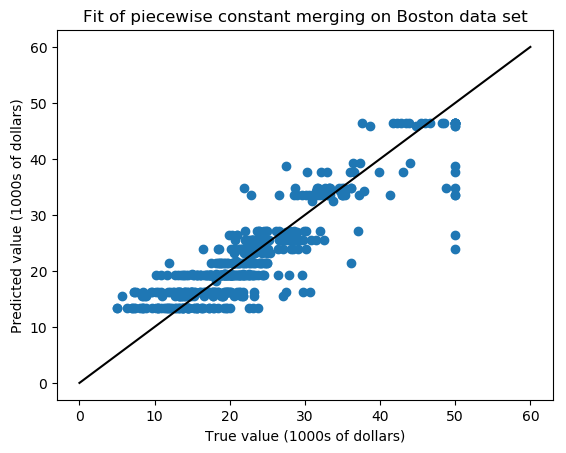

In [2]:
plt.scatter(y, yhat_merging) 
plt.plot([0,60],[0,60],"black")
xlabel("True value (1000s of dollars)")
ylabel("Predicted value (1000s of dollars)")
title("Fit of piecewise constant merging on Boston data set")
plt.show()

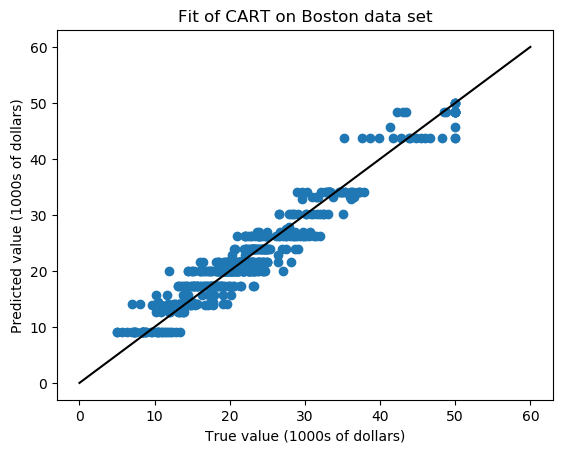

In [3]:
plt.scatter(y, yhat_cart) 
plt.plot([0,60],[0,60],"black")
xlabel("True value (1000s of dollars)")
ylabel("Predicted value (1000s of dollars)")
title("Fit of CART on Boston data set")
plt.show()

In [4]:
@sk_import metrics: r2_score
println(r2_score(y,yhat_merging))
println(r2_score(y, yhat_cart))


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = import_sklearn() at Skcore.jl:120
└ @ ScikitLearn.Skcore C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:120


0.772061161763636
0.9270940591060598


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at Skcore.jl:158
└ @ Core C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:158


In [5]:
algo_colors = Dict([("cart", "blue"), ("merging", "orange")])

Dict{String,String} with 2 entries:
  "merging" => "orange"
  "cart"    => "blue"

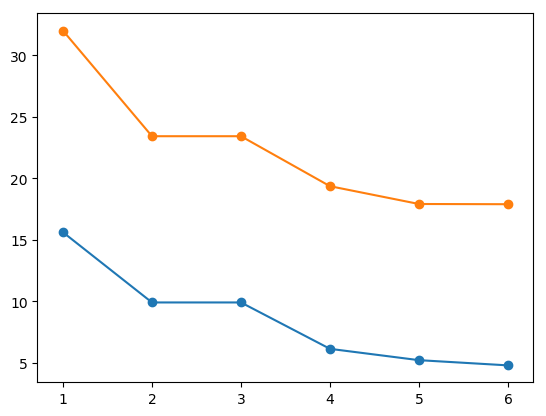

In [6]:
sigma_index = 2
plt.scatter(k_vals,mses["cart"][sigma_index ,:])
plt.plot(k_vals, mses["cart"][sigma_index ,:])
plt.scatter(k_vals,mses["merging"][sigma_index ,:])
plt.plot(k_vals, mses["merging"][sigma_index ,:])
plt.show()

In [7]:
mses["cart"]

6×6 Array{Float64,2}:
 15.6223  9.92245  9.92245  6.15469  5.23488  5.08994
 15.6223  9.92245  9.92245  6.15469  5.23488  4.81165
 15.6223  9.92245  9.92245  6.3434   5.61408  5.08994
 15.6223  8.99961  7.61305  6.15469  5.23488  4.81165
 15.6223  8.61458  7.92231  6.15469  4.94849  4.46376
 15.6223  9.40527  7.03448  5.23488  5.08994  4.57979

In [8]:
mses["merging"]

6×6 Array{Float64,2}:
 31.9971  23.4245  23.4245  19.3652  19.1251  18.1243
 31.9971  23.4245  23.4245  19.3652  17.919   17.9016
 31.9971  23.4245  23.4245  19.3842  18.0495  17.6969
 31.9971  24.6786  21.9396  19.2425  17.8515  17.2388
 31.9971  24.5674  23.1938  21.5236  20.0336  17.7797
 31.9971  30.5071  24.1155  20.4768  19.9765  19.1971